In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns

In [2]:
df = pd.read_csv(
    r"C:\Users\W\Downloads\AMS2_F1_AustriaRedbullRing_20250913.csv",sep="\s")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\w\AppData\Local\Temp\ipykernel_1532\2300199419.py:2: SyntaxWarning: invalid escape sequence '\s'
  r"C:\Users\W\Downloads\AMS2_F1_AustriaRedbullRing_20250913.csv",sep="\s")
C:\Users\w\AppData\Local\Temp\ipykernel_1532\2300199419.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [ ]:


vel_cols = ["velocity_X", "velocity_Y", "velocity_Z"]
if all(c in df.columns for c in vel_cols):
    df["Speed_kmh"] = np.sqrt(df["velocity_X"]**2 + df["velocity_Y"]**2 + df["velocity_Z"]**2) * 3.6
    df.drop(columns=vel_cols, inplace=True)
    
    
pressure_pascal = ["tyre_press_0", "tyre_press_1", "tyre_press_2", "tyre_press_3"]
for col in pressure_pascal:
    if col in df.columns:
        df[col] = df[col] / 100000.0  # 1 bar = 100,000 Pascal
        
for col in ["oil_press", "fuel_press", "water_press"]:
    if col in df.columns:
        df[col] = df[col] / 100000.0  







# ---------------------------
lap_cols = ["lapIndex", "lap_number", "lapNum"]
lap_col = next((c for c in lap_cols if c in df.columns), None)

if lap_col:
    min_lap = df[lap_col].min()
    max_lap = df[lap_col].max()
    df = df[(df[lap_col] != min_lap) & (df[lap_col] != max_lap)]
    
df["LapDistance_m"] = df["lap_distance"] * 0.3048


df = df.dropna()
df = df.drop_duplicates().reset_index(drop=True)

In [4]:
max_Speed = df.groupby('lapNum')['Speed_kmh'].max().reset_index()
max_Speed

,lapNum,Speed_kmh
0,0,313.773815
1,1,310.504475
2,2,311.651000
3,3,289.912471
4,4,263.980898
5,5,308.207709
6,6,310.248766


C:\Users\w\AppData\Local\Temp\ipykernel_1532\3942568821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=max_Speed, x='lapNum', y='Speed_kmh', palette='viridis')


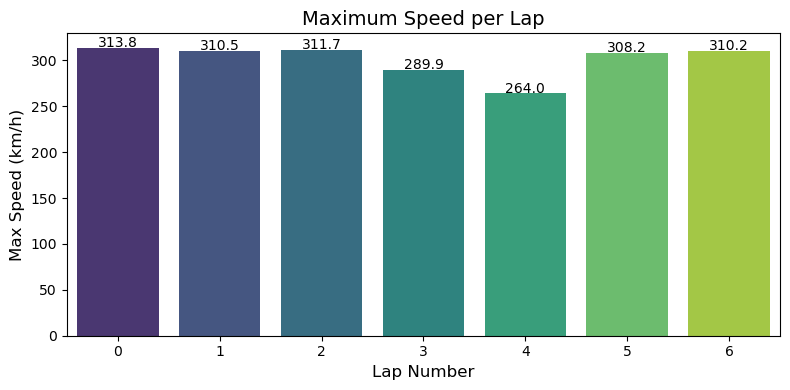

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))  

barplot = sns.barplot(data=max_Speed, x='lapNum', y='Speed_kmh', palette='viridis')

# عنوان ومحاور
plt.title('Maximum Speed per Lap', fontsize=14)
plt.xlabel('Lap Number', fontsize=12)
plt.ylabel('Max Speed (km/h)', fontsize=12)

# إضافة الأرقام فوق كل بار
for index, row in max_Speed.iterrows():
    barplot.text(row.name, row['Speed_kmh'] + 1, f"{row['Speed_kmh']:.1f}", 
                 color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
min_Speed = df.groupby('lapNum')['Speed_kmh'].min().reset_index()
min_Speed

,lapNum,Speed_kmh
0,0,55.367442
1,1,59.541786
2,2,0.350738
3,3,59.025176
4,4,43.296365
5,5,52.015571
6,6,62.992917


C:\Users\w\AppData\Local\Temp\ipykernel_1532\2168455146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=min_Speed, x='lapNum', y='Speed_kmh', palette='mako')


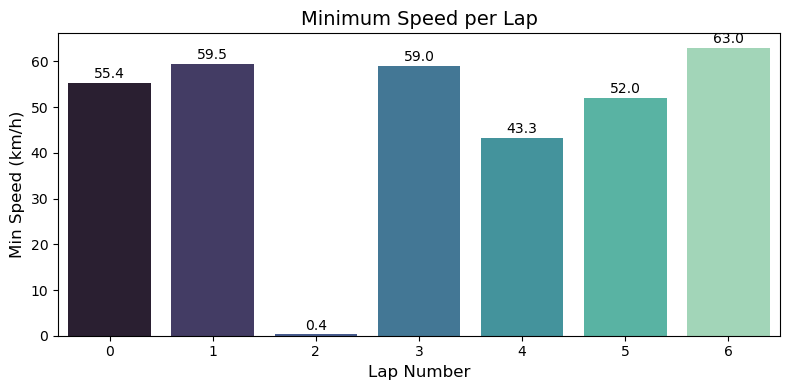

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4)) 

barplot = sns.barplot(data=min_Speed, x='lapNum', y='Speed_kmh', palette='mako')


plt.title('Minimum Speed per Lap', fontsize=14)
plt.xlabel('Lap Number', fontsize=12)
plt.ylabel('Min Speed (km/h)', fontsize=12)


for index, row in min_Speed.iterrows():
    barplot.text(row.name, row['Speed_kmh'] + 1, f"{row['Speed_kmh']:.1f}", 
                 color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
avg_Speed = df.groupby('lapNum')['Speed_kmh'].mean().reset_index()
avg_Speed

,lapNum,Speed_kmh
0,0,235.804056
1,1,235.271348
2,2,207.266678
3,3,139.627522
4,4,97.914046
5,5,233.525021
6,6,231.743743


C:\Users\w\AppData\Local\Temp\ipykernel_1532\620707092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_Speed, x='lapNum', y='Speed_kmh', palette='cubehelix')


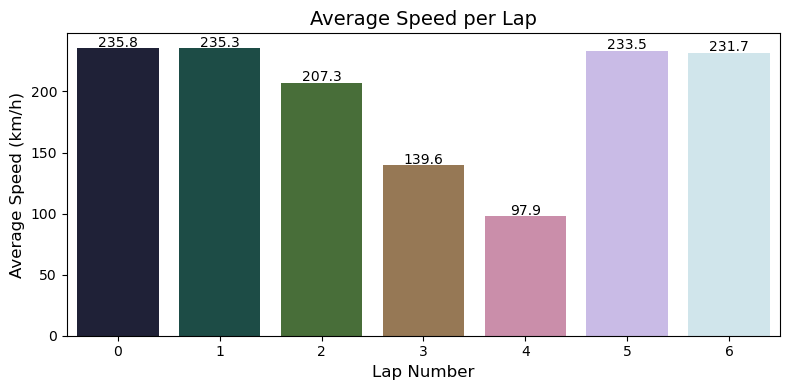

In [ ]:


plt.figure(figsize=(8, 4))  

barplot = sns.barplot(data=avg_Speed, x='lapNum', y='Speed_kmh', palette='cubehelix')


plt.title('Average Speed per Lap', fontsize=14)
plt.xlabel('Lap Number', fontsize=12)
plt.ylabel('Average Speed (km/h)', fontsize=12)


for index, row in avg_Speed.iterrows():
    barplot.text(row.name, row['Speed_kmh'] + 1, f"{row['Speed_kmh']:.1f}", 
                 color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

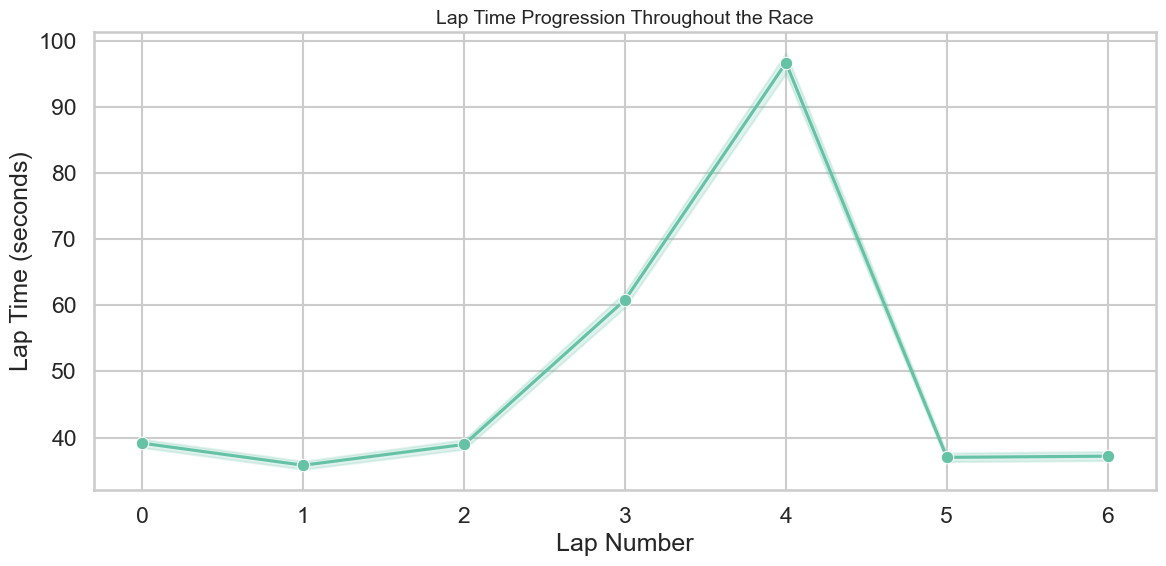

In [30]:


# Set figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot lap_time against lap_number to visualize performance over time
sns.lineplot(data=df, x='lapNum', y='lap_time', marker='o')

# Add title and axis labels
plt.title('Lap Time Progression Throughout the Race', fontsize=14)
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')

# Add grid for easier reading
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
avg_press_for_every_tyre_bar = df.groupby('lapNum')[['tyre_press_0', 'tyre_press_1', 'tyre_press_2', 'tyre_press_3']].mean()
avg_press_for_every_tyre_bar.columns = ['FL', 'FR', 'RL', 'RR']
avg_press_for_every_tyre_bar

,FL,FR,RL,RR
lapNum,,,,
0,1.370487,1.366071,1.254717,1.252522
1,1.448887,1.430482,1.321213,1.314535
2,1.511070,1.489067,1.366826,1.360373
3,1.503678,1.482881,1.343789,1.338567
4,1.363996,1.353823,1.212108,1.208711
5,1.367329,1.355735,1.226079,1.222203
6,1.446247,1.429709,1.304098,1.298796


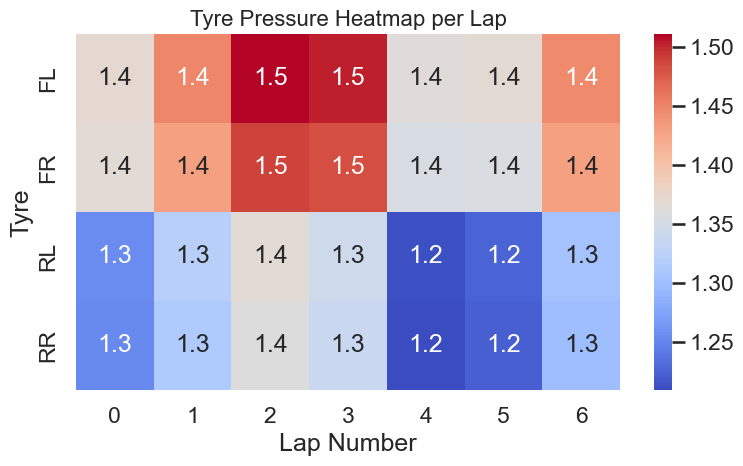

In [36]:


plt.figure(figsize=(8, 5))
sns.heatmap(avg_press_for_every_tyre_bar.T, annot=True, cmap='coolwarm', fmt=".1f")

plt.title('Tyre Pressure Heatmap per Lap', fontsize=16)
plt.xlabel('Lap Number')
plt.ylabel('Tyre')
plt.tight_layout()
plt.show()

In [33]:
avg_temp_for_every_tyre_C = df.groupby('lapNum')[['tyre_temp_0', 'tyre_temp_1', 'tyre_temp_2', 'tyre_temp_3']].mean()
avg_temp_for_every_tyre_C.columns = ['FL', 'FR', 'RL', 'RR']

avg_temp_for_every_tyre_C

,FL,FR,RL,RR
lapNum,,,,
0,77.088672,75.195915,81.923747,81.600975
1,96.845752,91.788417,97.545961,96.594475
2,99.359680,97.217386,102.427809,101.232126
3,88.565344,86.971448,94.069058,93.232591
4,76.299907,76.243617,73.901695,73.408426
5,74.741063,73.811049,77.973305,77.305130
6,85.117224,83.152739,89.974118,90.165158


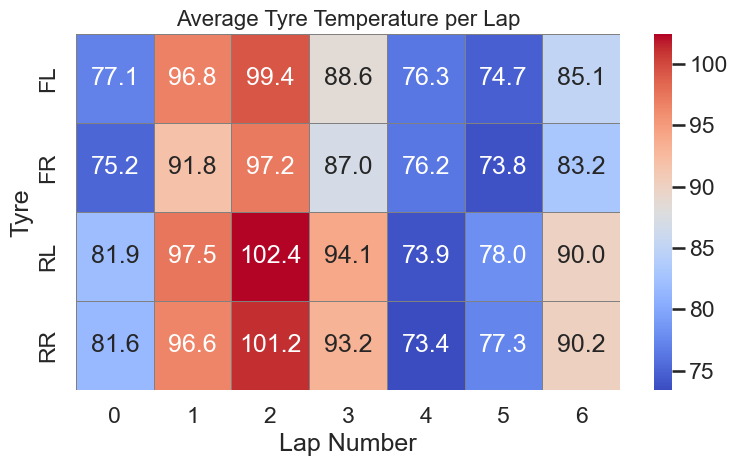

In [ ]:


plt.figure(figsize=(8, 5))

sns.heatmap(avg_temp_for_every_tyre_C.T, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, linecolor='gray')

plt.title('Average Tyre Temperature per Lap', fontsize=16)
plt.xlabel('Lap Number')
plt.ylabel('Tyre')

plt.tight_layout()
plt.show()

In [14]:
ambient_per_lap =  df.groupby('lapNum')['ambient_temp'].mean().reset_index(name='avg_ambient_temp')


print(ambient_per_lap)

   lapNum  avg_ambient_temp
0       0         33.515669
1       1         35.000000
2       2         34.990019
3       3         24.932683
4       4         29.399141
5       5         32.000000
6       6         32.000000


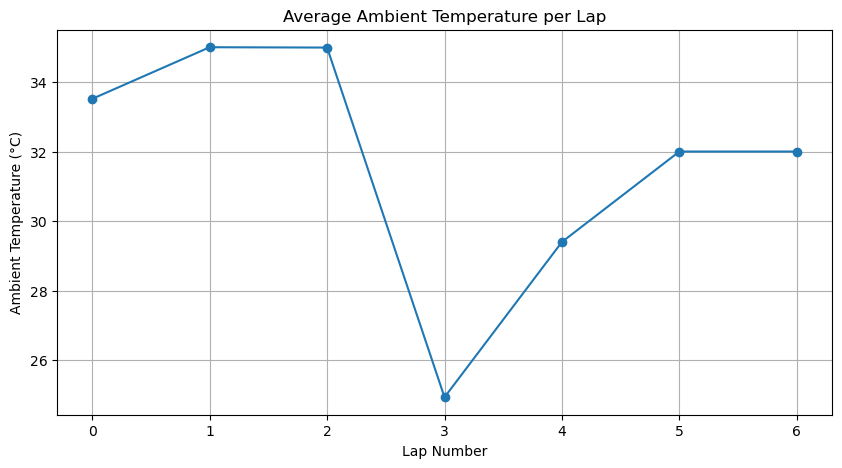

In [15]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ambient_per_lap['lapNum'], ambient_per_lap['avg_ambient_temp'], marker='o')
plt.title('Average Ambient Temperature per Lap')
plt.xlabel('Lap Number')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()

In [16]:
avg_fual_per_lap = df.groupby('lapNum')['fuel'].mean().reset_index()
avg_fual_per_lap

,lapNum,fuel
0,0,26.515151
1,1,24.686663
2,2,22.842748
3,3,21.402156
4,4,20.564275
5,5,19.095064
6,6,17.259163


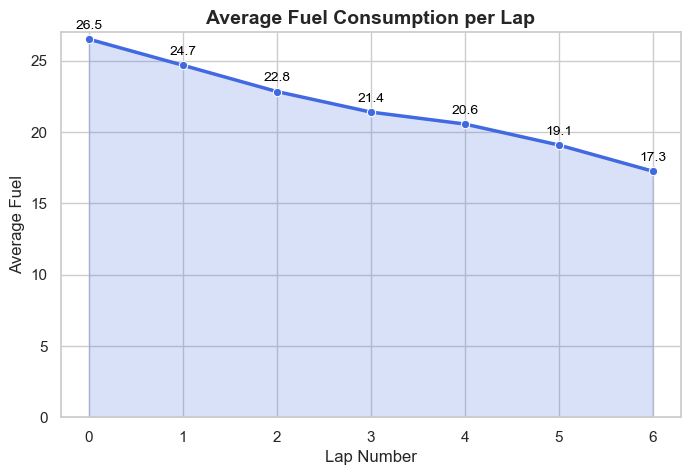

In [17]:


# Set style
sns.set_theme(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.lineplot(
    x="lapNum", y="fuel", data=avg_fual_per_lap,
    marker="o", linewidth=2.5, color="royalblue"
)


# Fill area under the curve for better effect
plt.fill_between(avg_fual_per_lap["lapNum"], avg_fual_per_lap["fuel"], alpha=0.2, color="royalblue")
for x, y in zip(avg_fual_per_lap["lapNum"], avg_fual_per_lap["fuel"]):
    plt.text(x, y+0.5, f"{y:.1f}", ha='center', va='bottom', fontsize=10, color="black")


# Titles and labels
plt.title("Average Fuel Consumption per Lap", fontsize=14, weight="bold")
plt.xlabel("Lap Number", fontsize=12)
plt.ylabel("Average Fuel", fontsize=12)
plt.ylim(0, 27)

plt.show()

In [18]:
press_effect_per_lap = df.groupby('lapNum')[['oil_press', 'fuel_press', 'water_press']].mean()
press_effect_per_lap

,oil_press,fuel_press,water_press
lapNum,,,
0,6.240241,0.58,3.509069
1,6.161277,0.58,3.466012
2,5.861287,0.58,3.294994
3,5.088830,0.58,2.860327
4,4.941334,0.58,2.785460
5,6.166675,0.58,3.468902
6,6.058802,0.58,3.407584


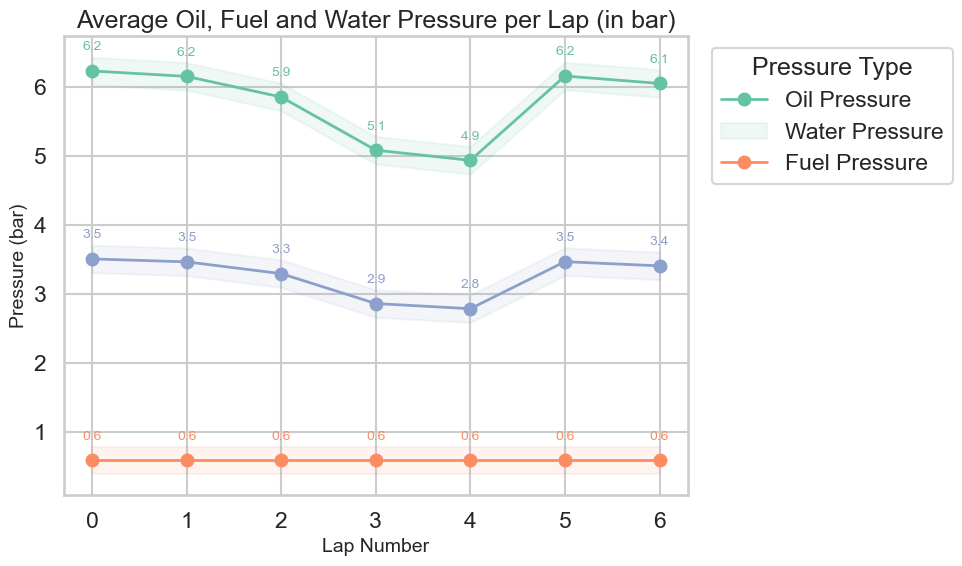

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid", context="talk", palette="Set2")
plt.figure(figsize=(10, 6))

# Plot each pressure type with shaded band and value labels
for pressure_type, color in zip(
    ["oil_press", "fuel_press", "water_press"],
    sns.color_palette("Set2", n_colors=3)
):
    values = press_effect_per_lap[pressure_type]
    laps = press_effect_per_lap.index

    # Draw line with markers
    plt.plot(laps, values, marker="o", color=color, linewidth=2)
    
    # Add shaded band around the line
    plt.fill_between(laps, values - 0.2, values + 0.2, color=color, alpha=0.1)

    # Annotate each point with its value
    for lap, val in zip(laps, values):
        plt.text(lap, val + 0.3, f"{val:.1f}", color=color, ha="center", fontsize=10)

# Title and axis labels with unit clarification
plt.title("Average Oil, Fuel and Water Pressure per Lap (in bar)", fontsize=18)
plt.xlabel("Lap Number", fontsize=14)
plt.ylabel("Pressure (bar)", fontsize=14)

# Legend positioned outside the plot
plt.legend(["Oil Pressure" , "Water Pressure","Fuel Pressure"],
           title="Pressure Type", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [20]:
RPMs = df.groupby('lapNum')['rpm'].mean().reset_index()
RPMs


,lapNum,rpm
0,0,11102.864903
1,1,10960.025093
2,2,10344.664095
3,3,9057.173294
4,4,8835.309308
5,5,10973.784016
6,6,10782.198835


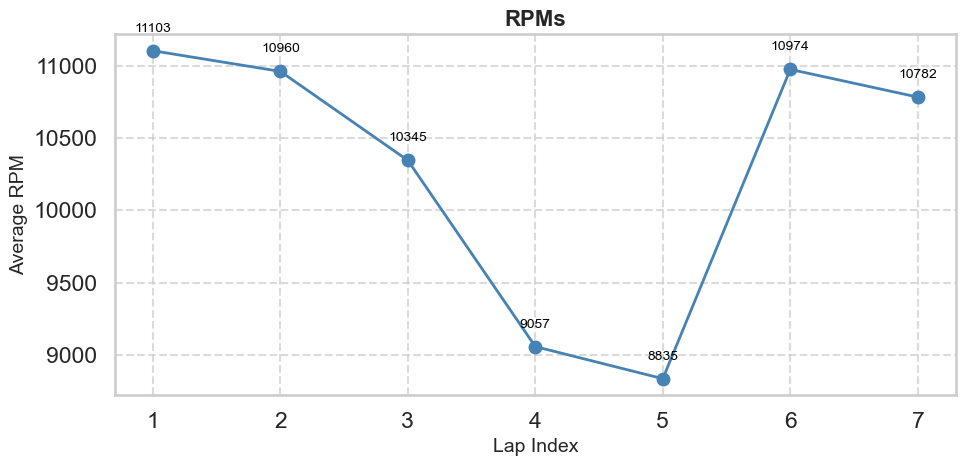

In [21]:


# Assume your data is in df
# Calculate average RPM per lap
rpm_per_lap = df.groupby('lapIndex')['rpm'].mean().reset_index(name='avg_rpm')

plt.figure(figsize=(10,5))

# Draw the line plot with gentle color
plt.plot(rpm_per_lap['lapIndex'], rpm_per_lap['avg_rpm'], 
         marker='o', color='steelblue', linewidth=2)

# Add the numbers above each point
for x, y in zip(rpm_per_lap['lapIndex'], rpm_per_lap['avg_rpm']):
    plt.text(x, y + (rpm_per_lap['avg_rpm'].max()*0.01),  # small offset above
             f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Title and labels
plt.title('RPMs', fontsize=16, fontweight='bold')
plt.xlabel('Lap Index', fontsize=14)
plt.ylabel('Average RPM', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

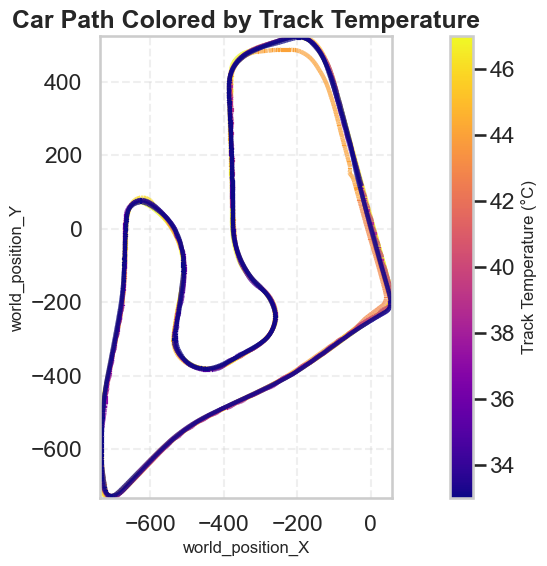

In [22]:



# Extract coordinates and track temperature from the DataFrame
x = df['world_position_X'].values
y = df['world_position_Y'].values
temp = df['track_temp'].values  # Track temperature values

# Create an array of line segments from point to point
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection where color is mapped to track temperature
lc = LineCollection(
    segments,
    cmap='plasma',                          # Color map for temperature
    norm=plt.Normalize(temp.min(), temp.max())  # Normalize colors
)
lc.set_array(temp)  # Assign temperature values to the line
lc.set_linewidth(3)  # Line thickness

# Plotting
plt.figure(figsize=(12, 6))
plt.gca().add_collection(lc)  # Add the colored line to the axes

# Set the plot limits to the data bounds
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.gca().set_aspect('equal', adjustable='box')  # Keep aspect ratio equal

# Title and axis labels
plt.title('Car Path Colored by Track Temperature', fontsize=18, fontweight='bold')
plt.xlabel('world_position_X', fontsize=12)
plt.ylabel('world_position_Y', fontsize=12)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.3)

# Add a colorbar to show temperature values
cbar = plt.colorbar(lc)
cbar.set_label('Track Temperature (°C)', fontsize=12)

plt.tight_layout()
plt.show()

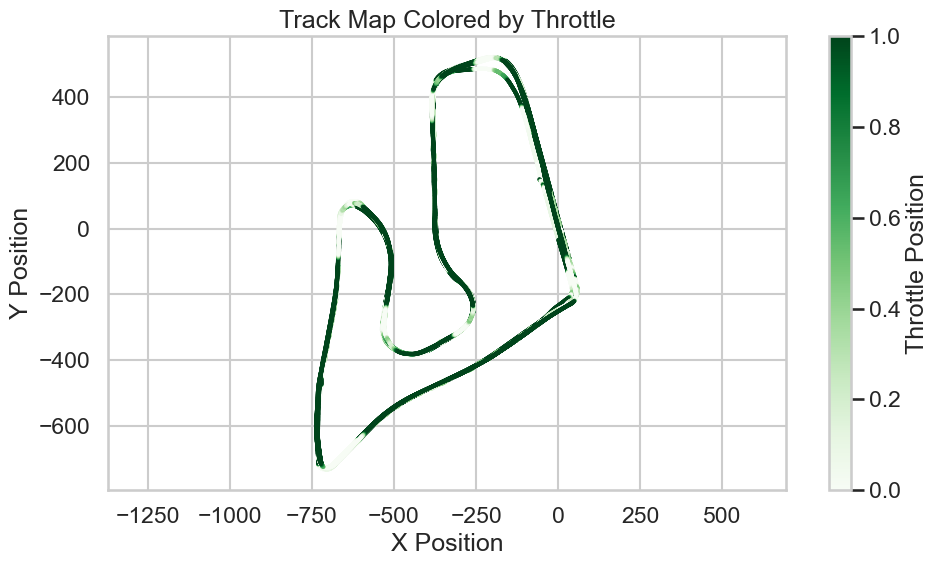

In [37]:
import matplotlib.pyplot as plt

# Create scatter plot of track map colored by throttle
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['world_position_X'], df['world_position_Y'],
                 c=df['throttle'], cmap='Greens', s=2)

plt.colorbar(sc, label='Throttle Position')
plt.title('Track Map Colored by Throttle')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

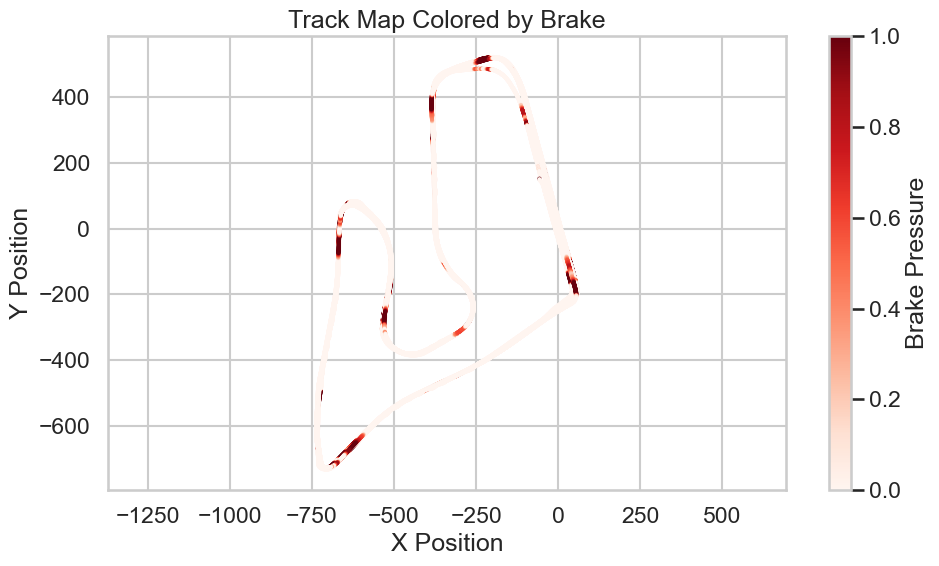

In [38]:
# Create scatter plot of track map colored by brake
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['world_position_X'], df['world_position_Y'],
                 c=df['brake'], cmap='Reds', s=2)

plt.colorbar(sc, label='Brake Pressure')
plt.title('Track Map Colored by Brake')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
df['throttle'].mean()

np.float64(0.6756296050186363)

In [24]:
# calculate throttle & brake percentages (0–100%)
df['throttle_percentage'] = df['throttle'] * 100
df['brake_percentage'] = df['brake'] * 100

lap_percentages = df.groupby('lapNum')[['throttle_percentage', 'brake_percentage']].mean()


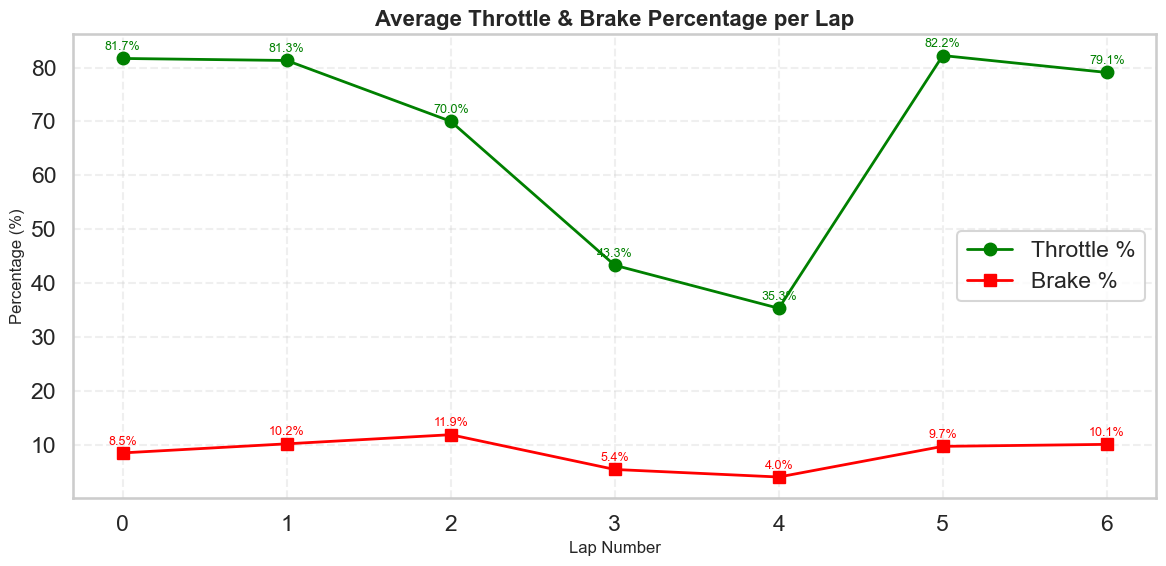

In [25]:
# Plot both throttle and brake percentage per lap
plt.figure(figsize=(12, 6))

plt.plot(
    lap_percentages.index, lap_percentages['throttle_percentage'],
    marker='o', linewidth=2, label='Throttle %', color='green'
)
plt.plot(
    lap_percentages.index, lap_percentages['brake_percentage'],
    marker='s', linewidth=2, label='Brake %', color='red'
)

# Add values above each point (optional)
for x, y in zip(lap_percentages.index, lap_percentages['throttle_percentage']):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', fontsize=9, color='green')
for x, y in zip(lap_percentages.index, lap_percentages['brake_percentage']):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', fontsize=9, color='red')

plt.title('Average Throttle & Brake Percentage per Lap', fontsize=16, fontweight='bold')
plt.xlabel('Lap Number', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
gears_per_lap = (
    df.groupby('lapNum')['gear']
      .apply(lambda x: x.value_counts().idxmax())
      .reset_index(name='most_used_gear')
)

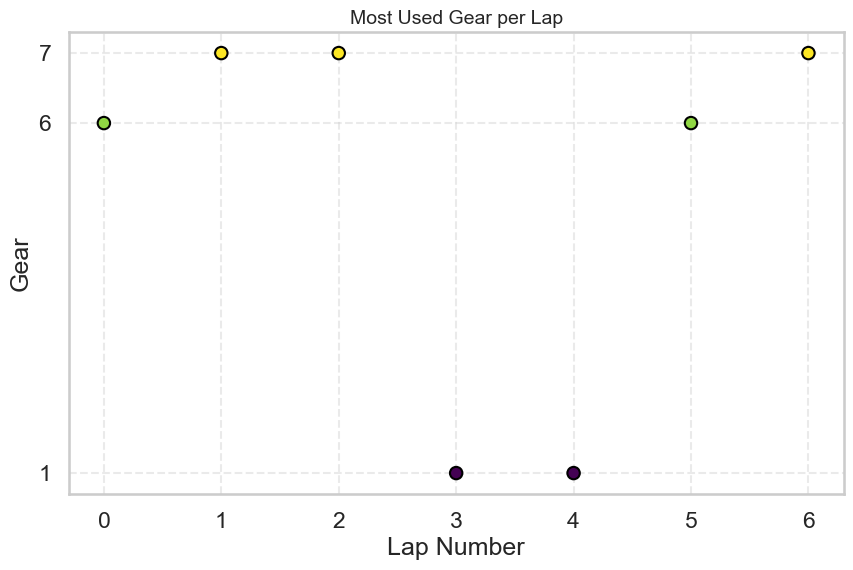

In [27]:
import matplotlib.pyplot as plt

# Calculate the most used gear for each lap
gears_per_lap = (
    df.groupby('lapNum')['gear']
      .apply(lambda x: x.value_counts().idxmax())
      .reset_index(name='most_used_gear')
)

plt.figure(figsize=(10,6))

# Scatter plot: each point = one lap
plt.scatter(
    gears_per_lap['lapNum'],                 # x-axis: lap number
    gears_per_lap['most_used_gear'],         # y-axis: most used gear
    c=gears_per_lap['most_used_gear'],       # color based on gear value
    cmap='viridis',                          # color palette
    s=80, edgecolors='black'                 # size and edge color of points
)

# Title and labels
plt.title('Most Used Gear per Lap', fontsize=14)
plt.xlabel('Lap Number')
plt.ylabel('Gear')

# Make sure gears are sorted on y-axis
plt.yticks(sorted(gears_per_lap['most_used_gear'].unique()))

# Add a light grid
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()